 ___
# Atividade: Modelos probabilísticos discretos e Dados

Victor Hugo Leal Vieira da Silva e Felipe Scandiuzzi Moreira Netto
___

## Aula 10

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): Seções 3.2 e 3.3

**Hoje:**
1.	Descrever modelos discretos quanto aos resultados teóricos.
2.	Explicar a utilização de modelos probabilísticos no contexto da literatura estatística.
3.	Contrastar resultados teóricos e empíricos.
4.	Fechamento do conteúdo.

**Próxima aula:**
1. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Seção 5.1 (pág. 137) e Seção 5.2 (pág. 146).
___

In [186]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.
import itertools #importante para gerar todos os resultados possíveis!!


___
## <font color='blue'>Exercício 3</font> 
### <font color='red'>**Check para dia 13/09 em DUPLA **</font>

Esse exercício irá explorar uma modelagem de dados reais.

> **Confira alguns itens obrigatórios verificados durante a vistoria do Detran**

> *Todos os veículos, novos ou velhos, precisam passar por uma vistoria todos os anos. (...) O motorista precisa estar atento a alguns itens obrigatórios. Tudo deve funcionar perfeitamente, apresentar bom estado de conservação e estar dentro do prazo de validade.*

> <sup>Fonte: http://extra.globo.com/noticias/brasil/transito-seguro/confira-alguns-itens-obrigatorios-verificados-durante-vistoria-do-detran-10190355.html</sup>

Essa matéria lista 14 itens que são inspecionados pelo Detran, dentre os quais têm-se: extintor de incêndio deve estar dentro do prazo de validade; pneus devem estar em bom estado de conservação; buzina deve funcionar perfeitamente; e cintos de segurança para todos os ocupantes do carro. Se, no final das contas, todos os 14 itens estiverem funcionando perfeitamente, o motorista irá feliz para casa assegurado de que seu carro está sem problemas com a vistoria.

1. A base de dados `Carros.txt` apresenta, para cada um dos três mil carros de passeio vistoriados, duas informações: tipo de carro (1: Popular e 2: Não Popular) e quantidade de itens vistoriados em não conformidade (que pode variar de 0 a 14). 
    1. Considerando todos os carros, analise a quantidade de itens vistoriados em não conformidade. Pela tabela de frequências relativas, calcule a média e variância dessa quantidade. Interprete-os.
    2. Assuma que a variável *Quantidade de itens em não conformidade* possa ser ajustada pelo modelo Binomial com parâmetros $n=14$ e $p=0,10$. Interprete esses parâmetros para o problema em questão e, ainda, discuta se as propriedades da distribuição Binomial estão satisfeitas para o problema aqui em questão.
    
    **Independente da sua resposta anterior, considere que a distribuição binomial seja adequada para modelar a variável de interesse nos próximos itens!**
    3. Utilizando o método `stats.binom.pmf`, obtenha a probabilidade de cada uma das quantidades de itens em não conformidade quando $n=14$ e $p=0,10$. Calcule o valor esperado e a variância da quantidade de itens em não conformidade utilizando o método `stats.binom.stats` e via resultado da Tabela 4.4 do Magalhães e Lima (pág. 125).
    4. Compare as probabilidades teóricas com as frequências relativas observadas nos dados. Para isso, tem-se, por exemplo, as duas opções abaixo para comparar se os resultados empíricos se encaixam com o modelo teórico proposto. 
        - A primeira opção gráfica contrasta a frequência relativa e a probabilidade teórica para uma determinada quantidade de itens em não conformidade! Vide Figura 3.4 do livro Magalhães e Lima (pág. 87). Ou seja, essa opção contrasta a frequência relativa em um valor de $y$ e a probabilidade pontual $P(Y=y)$.
        - A segunda contrasta a frequência relativa acumulada com a probabilidade acumulada até determinada quantidade de itens em não conformidade. Ou seja, compara a frequência relativa acumulada até $y$ com a probabilidade acumulada $P(Y\leq y)$.
    Construa os gráficos de acordo com as duas opções e refine sua conclusão quanto ao uso do modelo teórico para ajustar a variável em questão!
    5. Na prática, qual a necessidade de um modelo probabilístico já que se têm os dados observados?
    6. Considerando apenas os carros populares, o modelo Binomial com parâmetros $n=14$ e $p=0,10$ é adequado para ajustar a variável Quantidade de itens em não conformidade? Se sim, justifique; caso não, sugira novos valores para os parâmetros da distribuição ajuste aos dados.

In [187]:
#Importando o documento Carros.txt
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())
carros = pd.read_table('Carros.txt', sep=' ')

#Números das variáveis presentes nos documentos 
carros.describe()

Esperamos trabalhar no diretório
C:\Users\VictorHugo\Documents\GitHub\CDEng\aula10


,Tipo,Quantidade
count,3000.00000,3000.000000
mean,1.40000,1.371333
std,0.48998,1.256969
min,1.00000,0.000000
25%,1.00000,0.000000
50%,1.00000,1.000000
75%,2.00000,2.000000
max,2.00000,8.000000


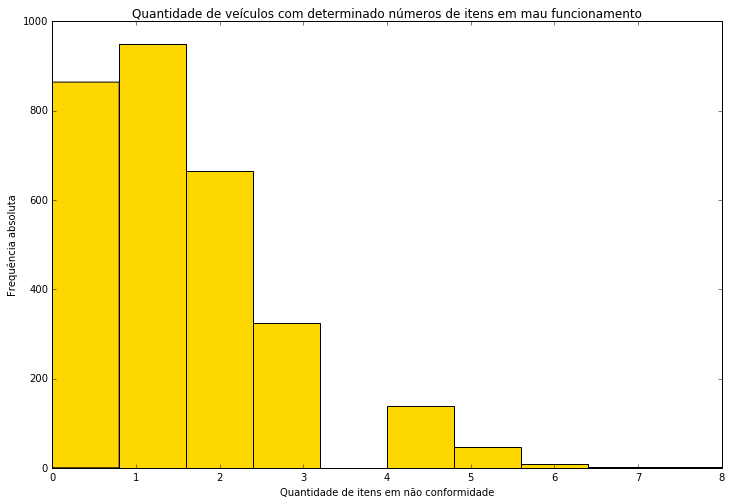

In [188]:
#Plotando o histograma da frequência da Quantidade de itens em não conformidade
plot = carros.Quantidade.plot.hist(color="gold", figsize=(12,8))
plt.xlabel("Quantidade de itens em não conformidade")
plt.ylabel("Frequência absoluta")
plt.title("Quantidade de veículos com determinado números de itens em mau funcionamento")

In [189]:
#Frequência de cada Quantidade de itens em não conformidade 
freq = carros.Quantidade.value_counts(True)
freq
#Obs: Não há veículos com mais de oito itens em mau funcionamento

1    0.316667
0    0.288000
2    0.221333
3    0.108333
4    0.046333
5    0.015667
6    0.002667
7    0.000667
8    0.000333
Name: Quantidade, dtype: float64

In [190]:
#Média ponderada das frequências
Media = 0

for i in range(9):
    Media += freq[i]*i
    
print("A média é de: {0}".format(Media))

A média é de: 1.3713333333333333


In [191]:
#Variância das frequências
Variancia = 0

for i in range(9):
    Variancia += (( i - Media)**2)*freq[i]

print("A variância é de: {0}".format(Variancia))

A variância é de: 1.5794448888888888


B) No problema em questão, 14 é o número máximo de itens que podem apresentar mau funcionamento, enquanto 0,10 é a probabilidade de um item estar em não conformidade. 


C)

In [192]:
#Cálculo da probabilidade, média, variância e desvio padrão teóricos
Prob_Teor = list()
for i in range(15):
    P_Yy = stats.binom.pmf(i, 14, 0.1) # Distribuição
    print("A probabilidade de {0} item(s) estar com mau funcionamento é de: {1} ".format(i,P_Yy))
    Prob_Teor.append(P_Yy)
    
E,Var = stats.binom.stats(14, 0.1, moments='mv')

print("\nMédia: {0}, Variância: {1}, Desvio Padrão: {2}".format(E,Var,Var**0.5))

A probabilidade de 0 item(s) estar com mau funcionamento é de: 0.22876792454960998 
A probabilidade de 1 item(s) estar com mau funcionamento é de: 0.3558612159660614 
A probabilidade de 2 item(s) estar com mau funcionamento é de: 0.2570108781977114 
A probabilidade de 3 item(s) estar com mau funcionamento é de: 0.11422705697676022 
A probabilidade de 4 item(s) estar com mau funcionamento é de: 0.03490271185401001 
A probabilidade de 5 item(s) estar com mau funcionamento é de: 0.007756158189780027 
A probabilidade de 6 item(s) estar com mau funcionamento é de: 0.0012926930316300015 
A probabilidade de 7 item(s) estar com mau funcionamento é de: 0.0001641514960800007 
A probabilidade de 8 item(s) estar com mau funcionamento é de: 1.5959173230000058e-05 
A probabilidade de 9 item(s) estar com mau funcionamento é de: 1.1821609800000021e-06 
A probabilidade de 10 item(s) estar com mau funcionamento é de: 6.56756100000003e-08 
A probabilidade de 11 item(s) estar com mau funcionamento é de: 2

D)

Média: 1.4000000000000001, Variância: 1.2600000000000002, Desvio Padrão: 1.1224972160321824


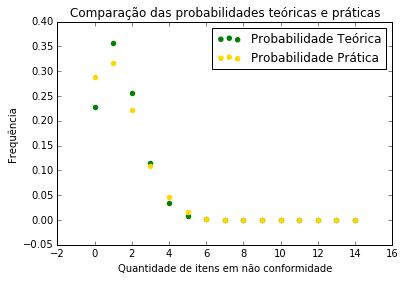

In [193]:
#Modelo teórico
Prob_Teor = list()
for i in range(15):
    P_Yy = stats.binom.pmf(i, 14, 0.1) #Distribuição
    Prob_Teor.append(P_Yy)
    
E,Var = stats.binom.stats(14, 0.1, moments='mv')
print("Média: {0}, Variância: {1}, Desvio Padrão: {2}".format(E,Var,Var**0.5))

#Modelo prático
Prob_Prat = list()
for i in range(9):
    Prob_Prat.append(freq[i])
for i in range(6):
    Prob_Prat.append(0)

Quantidad = range(15)    
#Plotando o gráfico comparando os resultados dos modelos teóricos e práticos.    
plt.scatter(Quantidad,Prob_Teor, color = "green")
plt.scatter(Quantidad,Prob_Prat, color = "gold")
plt.legend(("Probabilidade Teórica","Probabilidade Prática"))
plt.xlabel("Quantidade de itens em não conformidade")
plt.ylabel("Frequência")
plt.title("Comparação das probabilidades teóricas e práticas")
plt.show()

E)
Os dados probabilísticos permitem uma comparação do modelo prático com um modelo base, o que torna possível a análise de um modelo diferente do analisado impiricamente, mesmo que esse seja proporcionalmente diferente. 

F)

In [194]:
#Separando somente os carros populares do documento txt
popular = carros[(carros["Tipo"] == 1)]
freq_Pop = popular.Quantidade.value_counts(True)

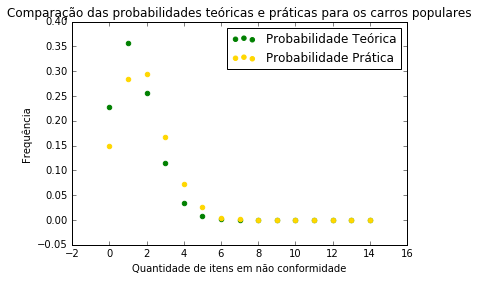

In [195]:
#Frequências das Quantidades de itens em não conformidade nos carros populares
Freq_Pop_Lista = list()

for i in range(9):
    Freq_Pop_Lista.append(freq_Pop[i])
for i in range(6):
    Freq_Pop_Lista.append(0)
    
#Plotando o gráfico comparando os resultados dos modelos teóricos e práticos para os carros populares. 
plt.scatter(Quantidad,Prob_Teor, color = "green")
plt.scatter(Quantidad,Freq_Pop_Lista, color = "gold")
plt.legend(("Probabilidade Teórica","Probabilidade Prática"))
plt.xlabel("Quantidade de itens em não conformidade")
plt.ylabel("Frequência")
plt.title("Comparação das probabilidades teóricas e práticas para os carros populares")
plt.show()

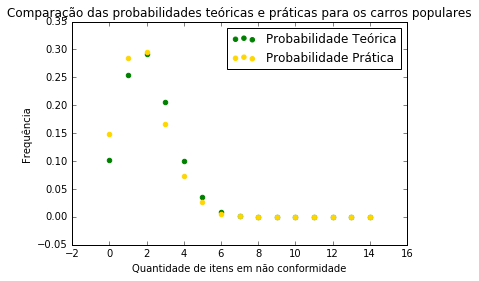

In [196]:
Prob_Teor = list()
for i in range(15):
    P_Yy = stats.binom.pmf(i, 14, 0.15) #Distribuição
    Prob_Teor.append(P_Yy)

#Plotando o gráfico comparando os resultados dos modelos teóricos e práticos para os carros populares. 
plt.scatter(Quantidad,Prob_Teor, color = "green")
plt.scatter(Quantidad,Freq_Pop_Lista, color = "gold")
plt.legend(("Probabilidade Teórica","Probabilidade Prática"))
plt.xlabel("Quantidade de itens em não conformidade")
plt.ylabel("Frequência")
plt.title("Comparação das probabilidades teóricas e práticas para os carros populares")
plt.show()